In [2]:
from mca_max_intensity_check import mca_intensity_distribution_plot

E_matrix, B_matrix, E_sms_matrix, B_sms_matrix = mca_intensity_distribution_plot('1991-3-1', '1993-3-1', del_inst_interference=['off', 'noisy', 'sms', 'bit rate m', 'bdr', 'pws'], suffix='_cusp')
print(E_matrix, B_matrix, E_sms_matrix, B_sms_matrix)

1991-03-01
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT
1991-03-02
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT
1991-03-03
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT
1991-03-04
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT
1991-03-05
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT
1991-03-06
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) 

In [9]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print(B_sms_matrix)

[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT
tinterpol (linear) was applied to: sc_vel


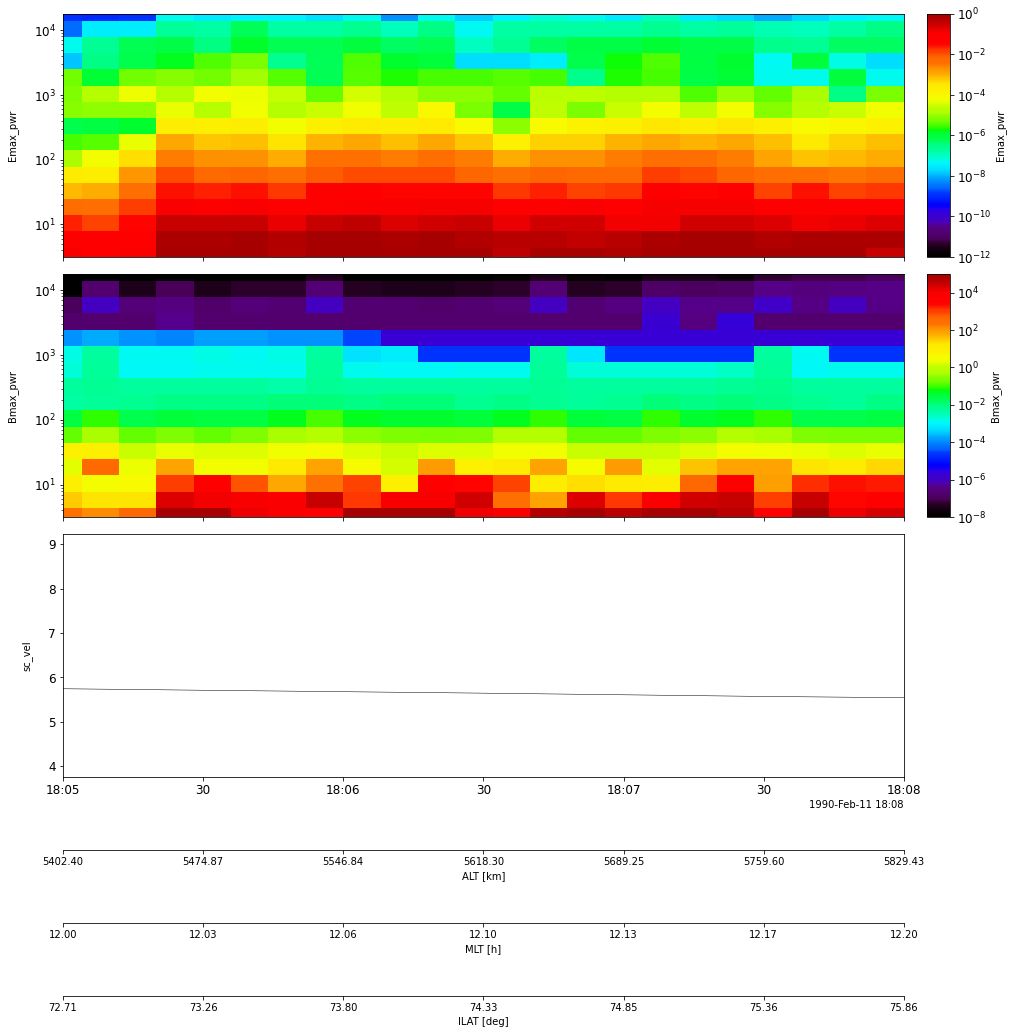

In [4]:
import load 
import pytplot
from pytplot import options, store_data, get_data
import pyspedas
import numpy as np
from pytplot.MPLPlotter.tplot import tplot

trange = ['1990-2-11', '1990-2-12']
load.mca(trange, spec_type='pwr', del_invalid_data=['off', 'noisy', 'bdr', 'bit rate m', 'pws'])
load.orb(trange)

postgap = get_data('PostGap')
postgap_array = np.empty([postgap.y.size, 6])
for i in range(postgap.y.size):
    postgap_str = format(postgap.y[i], '08b')
    #"off"               "noisy",             "BDR",               "SMS",               "Bit rate",          "PWS",    
    postgap_array[i][0], postgap_array[i][1], postgap_array[i][2], postgap_array[i][3], postgap_array[i][4], postgap_array[i][5] = \
    int(postgap_str[7]), int(postgap_str[6])+0.1, int(postgap_str[3])+0.2, int(postgap_str[2])+0.3, int(postgap_str[1])+0.4, int(postgap_str[0])+0.5 

store_data('Inst_flag', data = {'x':postgap.times, 'y':postgap_array})
store_data('sms_flag', data={'x':postgap.times, 'y':postgap_array.T[3]})
#set yaxis option "legend_location" as "spedas"
#a = pytplot.data_quants['Inst_flag']
#a.attrs['plot_options']['yaxis_opt']['legend_location'] = 'spedas'
options(['Inst_flag', 'sms_flag'], opt_dict={'yrange':[-0.3, 1.5], 'panel_size':0.3})
options('Inst_flag', opt_dict={'legend_names':['off', 'noisy', 'BDR', 'SMS', 'Bit rate M', 'PWS'], 'legend_location':'spedas'})

pyspedas.tinterpol('akb_ILAT', interp_to='Emax_pwr', newname = 'ILAT')
pyspedas.tinterpol('akb_MLAT', interp_to = 'Emax', newname = 'MLAT')
pyspedas.tinterpol('akb_MLT', interp_to = 'Emax', newname = 'MLT', method='nearest')
pyspedas.tinterpol('akb_ALT', interp_to = 'Emax', newname = 'ALT')
pyspedas.tinterpol('akb_sc_vel', interp_to = 'Emax', newname = 'sc_vel')
options('Emax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-12, 1]})
options('Bmax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-8, 1e5]})

options('ALT', 'ytitle', 'ALT [km]')
options('MLT', 'ytitle', 'MLT [h]')
options('ILAT', 'ytitle', 'ILAT [deg]')

pytplot.tlimit([trange[0]+' 18:05:00', trange[0]+' 18:08:00'])
tplot(['Emax_pwr','Bmax_pwr', 'sc_vel'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 16, ysize = 20)


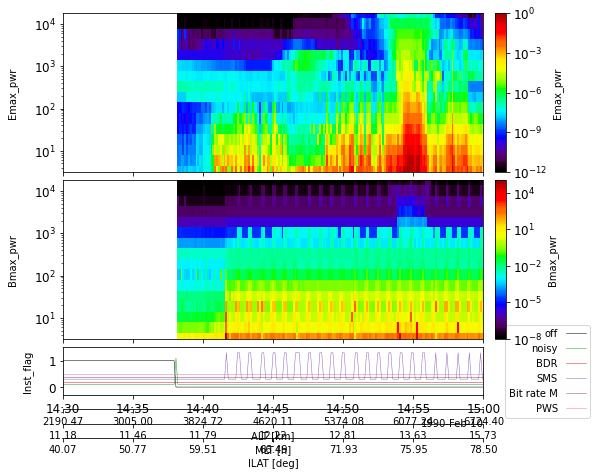

In [15]:
pytplot.tlimit([trange[0]+' 14:30:00', trange[0]+' 15:00:00'])
#pytplot.timebar([ trange[0] + ' 14:54:30',trange[0] + ' 14:55:40'], thick=1)
#options(['Emax_pwr','Bmax_pwr', 'ALT', 'MLT', 'ILAT'], 'char_size', 24)
tplot(['Emax_pwr','Bmax_pwr', 'Inst_flag'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 8, ysize = 10)

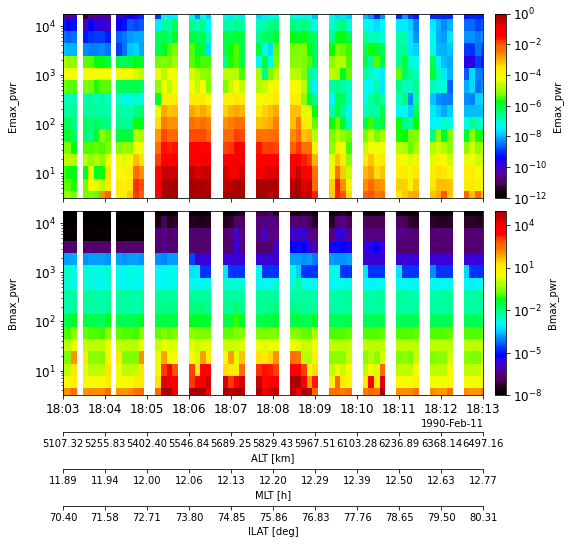

In [53]:
pytplot.tlimit([trange[0]+' 18:03:00', trange[0]+' 18:13:00'])
#pytplot.timebar([trange[0] + ' 18:05:39', trange[0] + ' 18:07:15'], thick=4)
tplot(['Emax_pwr','Bmax_pwr'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 8, ysize = 10)

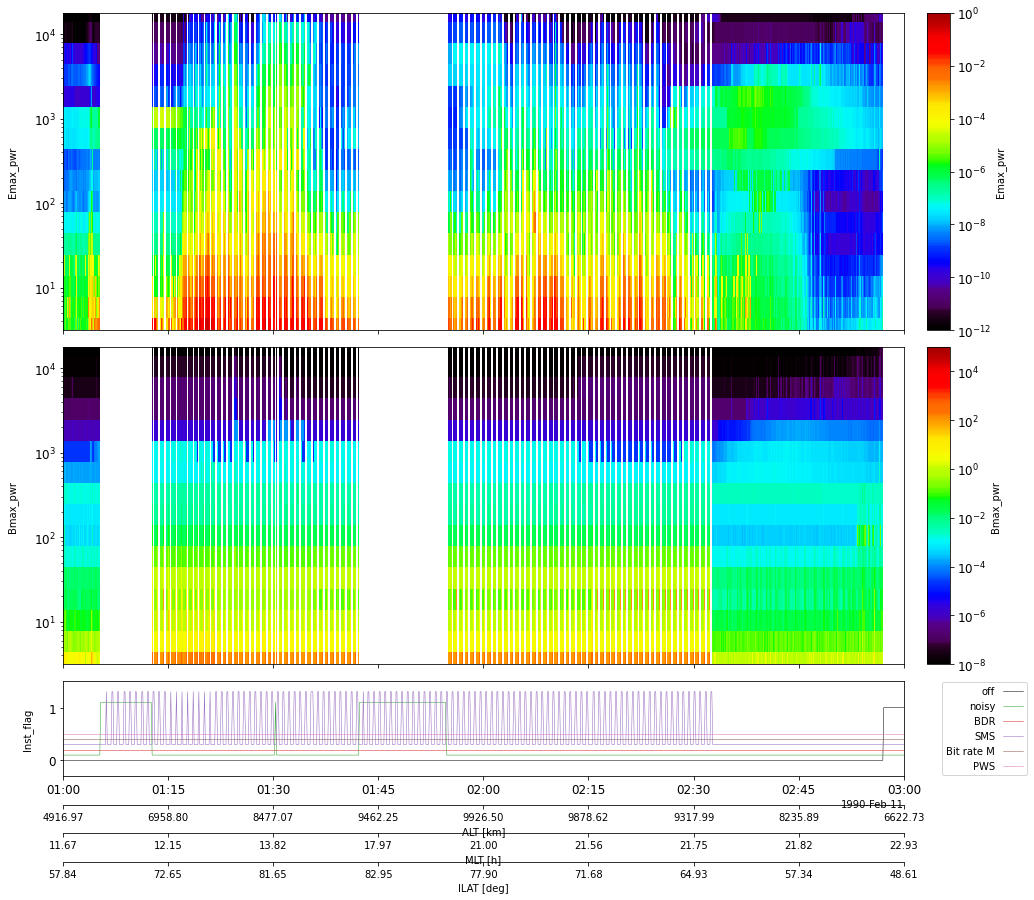

In [7]:
pytplot.tlimit([trange[0]+' 1:00:00', trange[0]+' 3:00:00'])
tplot(['Emax_pwr','Bmax_pwr', 'Inst_flag'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 16, ysize = 20)

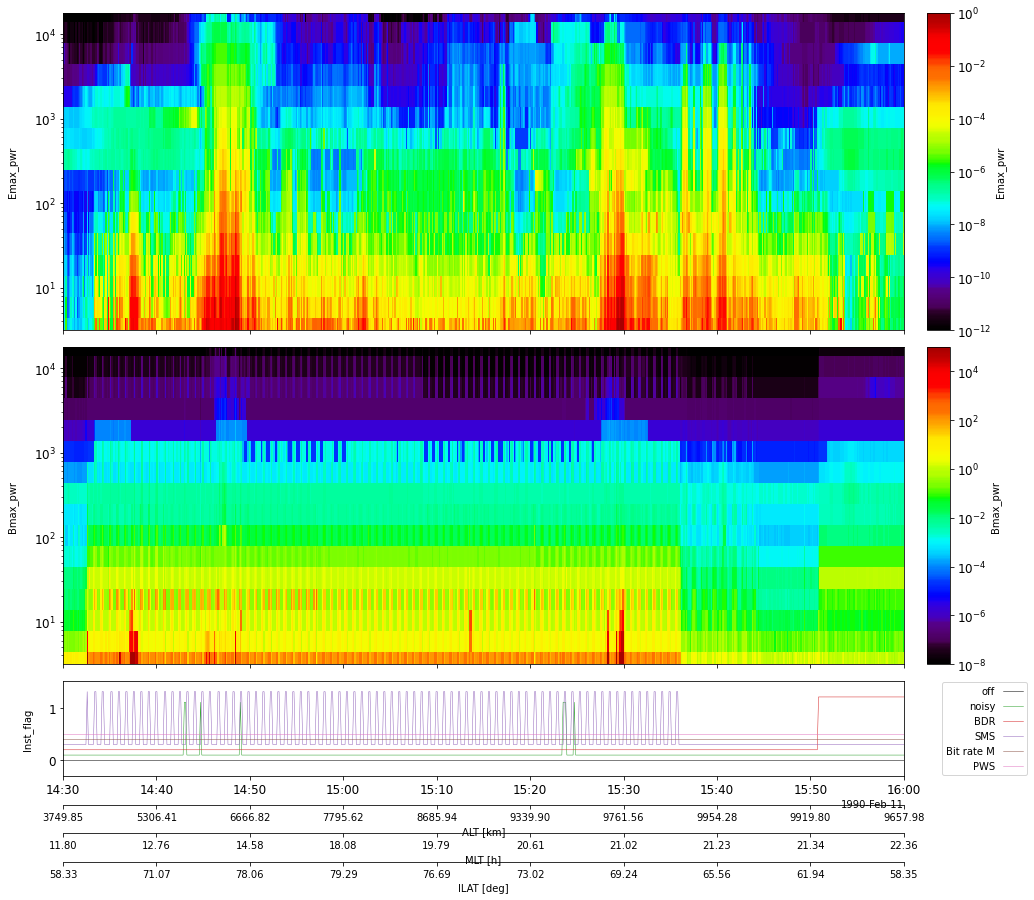

In [ ]:
pytplot.tlimit([trange[0]+' 14:30:00', trange[0]+' 16:00:00'])
tplot(['Emax_pwr','Bmax_pwr', 'Inst_flag'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 16, ysize = 20)

tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT


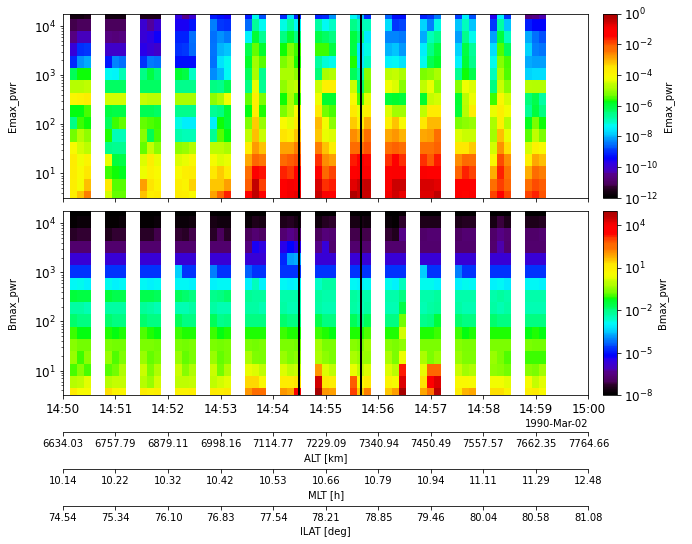

In [50]:
import load 
import pytplot
from pytplot import options, store_data, get_data, timebar
import pyspedas
import numpy as np
from pytplot.MPLPlotter.tplot import tplot

trange = ['1990-3-2', '1990-3-3']
load.mca(trange, spec_type='pwr', del_invalid_data=['off', 'noisy', 'sms', 'bdr'])
load.orb(trange)

pyspedas.tinterpol('akb_ILAT', interp_to='Emax_pwr', newname = 'ILAT')
pyspedas.tinterpol('akb_MLAT', interp_to = 'Emax', newname = 'MLAT')
pyspedas.tinterpol('akb_MLT', interp_to = 'Emax', newname = 'MLT', method='nearest')
pyspedas.tinterpol('akb_ALT', interp_to = 'Emax', newname = 'ALT')

options('Emax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-12, 1]})
options('Bmax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-8, 1e5]})

options('ALT', 'ytitle', 'ALT [km]')
options('MLT', 'ytitle', 'MLT [h]')
options('ILAT', 'ytitle', 'ILAT [deg]')

timebar(t=[pyspedas.time_double(trange[0] + ' 14:54:30'),  pyspedas.time_double(trange[0] + ' 14:55:40')], thick=2)
#timebar(t=pyspedas.time_double(trange[0] + ' :45:56'), dash=True)
pytplot.tlimit([trange[0]+' 14:50:00', trange[0]+' 15:00:00'])
tplot(['Emax_pwr','Bmax_pwr'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 10, ysize = 10)

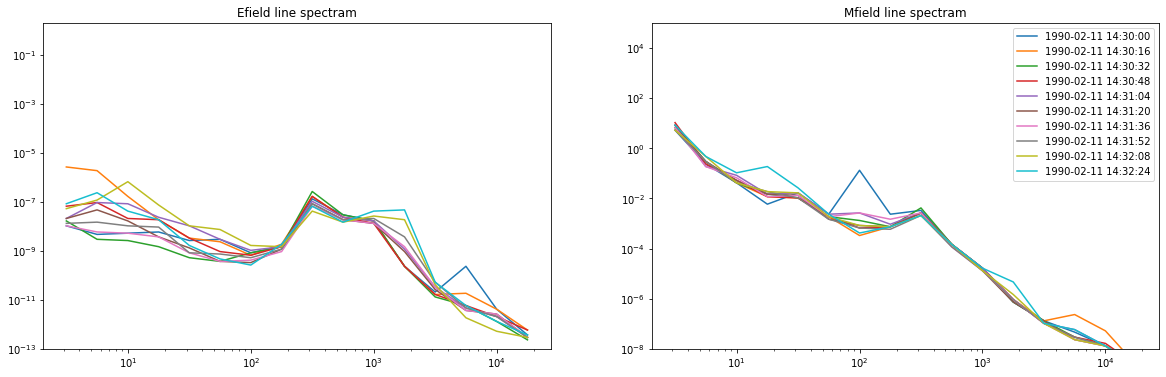

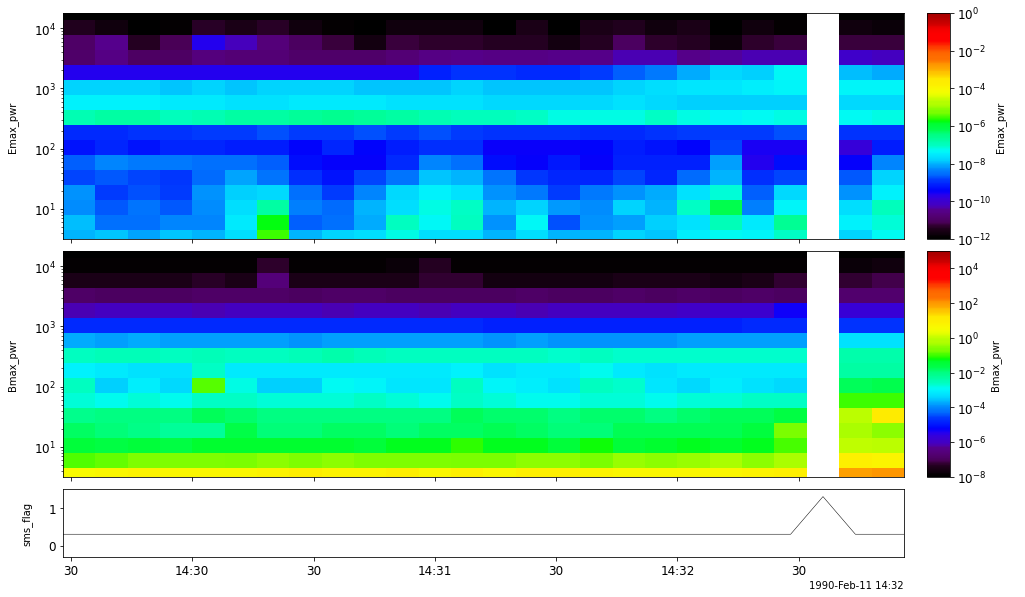

In [25]:
import load
import pyspedas
import pytplot
import matplotlib.pyplot as plt
from pytplot.MPLPlotter.tplot import tplot

trange = ['1990-2-11', '1990-2-12']
load.mca(trange = trange, del_invalid_data=['off', 'SMS'])
Emax_tvar = get_data('Emax_pwr')
Bmax_tvar = get_data('Bmax_pwr')

postgap = get_data('PostGap')
postgap_array = np.empty([postgap.y.size, 6])
for i in range(postgap.y.size):
    postgap_str = format(postgap.y[i], '08b')
    #"off"               "noisy",             "BDR",               "SMS",               "Bit rate",          "PWS",    
    postgap_array[i][0], postgap_array[i][1], postgap_array[i][2], postgap_array[i][3], postgap_array[i][4], postgap_array[i][5] = \
    int(postgap_str[7]), int(postgap_str[6])+0.1, int(postgap_str[3])+0.2, int(postgap_str[2])+0.3, int(postgap_str[1])+0.4, int(postgap_str[0])+0.5 

store_data('Inst_flag', data = {'x':postgap.times, 'y':postgap_array})
store_data('sms_flag', data={'x':postgap.times, 'y':postgap_array.T[3]})
#set yaxis option "legend_location" as "spedas"
#a = pytplot.data_quants['Inst_flag']
#a.attrs['plot_options']['yaxis_opt']['legend_location'] = 'spedas'
options(['Inst_flag', 'sms_flag'], opt_dict={'yrange':[-0.3, 1.5], 'panel_size':0.3})
options('Inst_flag', opt_dict={'legend_names':['off', 'noisy', 'BDR', 'SMS', 'Bit rate M', 'PWS'], 'legend_location':'spedas'})

start_time = pyspedas.time_double(['1990-02-11'])

#no sms interference
hr, tens_of_min = 14, 3 #min shuld be 0, 1, 2, 3, 4 or 5 + 0, 0.2, 0.4, 0.6, 0.8
slice_time_index = 450*hr + 75*tens_of_min
slice_time = start_time[0] + slice_time_index * 8

fig = plt.figure(figsize=[20, 6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(10):
    ax1.plot(Emax_tvar.v, Emax_tvar.y[slice_time_index+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
    ax2.plot(Bmax_tvar.v, Bmax_tvar.y[slice_time_index+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('Efield line spectram')
ax1.set_ylim(1e-13, 2)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title('Mfield line spectram')
ax2.set_ylim(1e-8, 1e5)
ax2.legend()

options('Emax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-12, 1]})
options('Bmax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-8, 1e5]})

pytplot.tlimit([slice_time-32, slice_time+22*8])
tplot(['Emax_pwr','Bmax_pwr', 'sms_flag'], xsize=16)

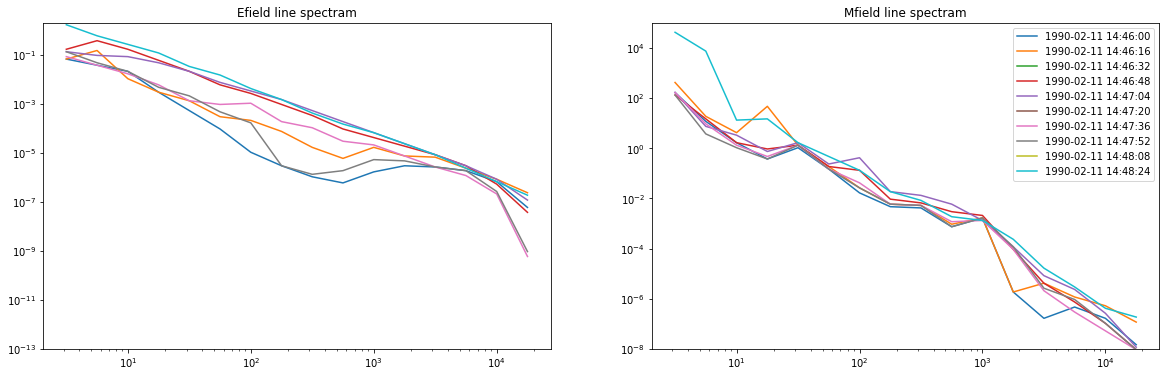

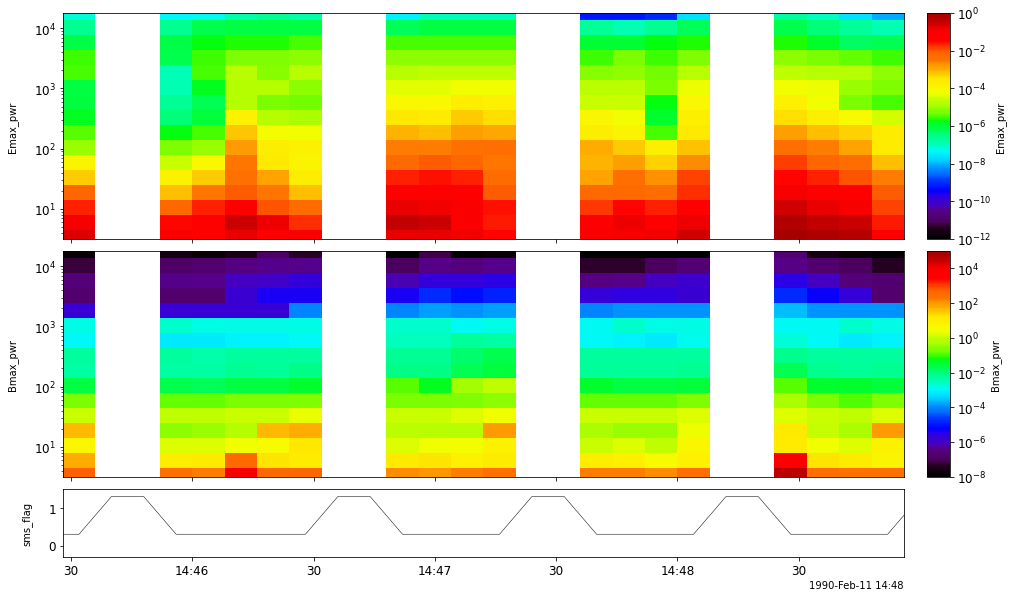

In [26]:
#sms interference
hr, tens_of_min = 14, 4.6 #min shuld be 0, 1, 2, 3, 4 or 5 + 0, 0.2, 0.4, 0.6, 0.8
slice_time_index = 450*hr + 75*tens_of_min
slice_time = start_time[0] + slice_time_index * 8

fig = plt.figure(figsize=[20, 6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(10):
    ax1.plot(Emax_tvar.v, Emax_tvar.y[int(slice_time_index)+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
    ax2.plot(Bmax_tvar.v, Bmax_tvar.y[int(slice_time_index)+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('Efield line spectram')
ax1.set_ylim(1e-13, 2)


ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title('Mfield line spectram')
ax2.set_ylim(1e-8, 1e5)
ax2.legend()

options('Emax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-12, 1]})
options('Bmax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-8, 1e5]})

pytplot.tlimit([slice_time-32, slice_time+22*8])
tplot(['Emax_pwr','Bmax_pwr', 'sms_flag'], xsize=16)

cdf�?の�?報を読み取る方�?

In [2]:
from pytplot import cdf_to_tplot
import pytplot
cdf_to_tplot('./Akebono_MCA_data/ak_h1_mca_19890101_v02.cdf')
gatt = get_data('Eave', metadata=True)['CDF']['VATT']
pytplot.data_quants['Eave']

<xarray.DataArray 'Eave' (time: 10800, v_dim: 16)>
array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
Coordinates:
  * time       (time) float64 5.996e+08 5.996e+08 ... 5.997e+08 5.997e+08
    spec_bins  (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
    v          (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Dimensions without coordinates: v_dim
Attributes:
    CDF:           {'VATT': {'AVG_TYPE': 'log', 'CATDESC': 'Electric field av...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In [1]:
import load 
import pytplot
import pyspedas
import numpy as np

trange = ['1990-2-11', '1990-2-12']
load.mca(trange, del_invalid_data=True)
load.orb(trange)
tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']
for i in range(4):
    tplot_variable = pytplot.get_data(tplot_names[i])
    tplot_variable_float = (tplot_variable.y).astype(float)
    np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
    tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2) / bandwidth
    pytplot.store_data(tplot_names[i] +'_amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
    pytplot.store_data(tplot_names[i] +'_pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})

try:
    pyspedas.tinterpol('akb_ILAT', interp_to='Emax_pwr', newname = 'ILAT')
except:
    print('orbit file is not perfect')
pyspedas.tinterpol('akb_MLAT', interp_to = 'Emax', newname = 'MLAT')
pyspedas.tinterpol('akb_MLT', interp_to = 'Emax', newname = 'MLT', method = 'nearest')
pyspedas.tinterpol('akb_ALT', interp_to = 'Emax', newname = 'ALT')

pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'spec', 1)
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'ylog', 1)
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'zlog', 1)
pytplot.options('Emax_pwr', 'ztitle', 'Electric field PSD \n [(mV/m)^2/Hz]')
pytplot.options('Emax_pwr', 'zrange', [1e-6, 1])
pytplot.options('Bmax_pwr', 'ztitle', 'Magnetic field PSD \n [(pT)^2/Hz]')
pytplot.options('Bmax_pwr', 'zrange', [1e-8, 1e1])
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'ytitle', 'freq [Hz]')
pytplot.tlimit([trange[0]+' 18:00:00', trange[0]+' 18:15:00'])

postgap = pytplot.get_data('PostGap')
postgap_array = np.empty([postgap.y.size, 8])
for i in range(postgap.y.size):
    postgap_str = format(postgap.y[i], '08b')
    #"off"               "noisy",                  "BDR",                   "SMS",                    "Bit rate",              "PWS",                    "3bit",              "4bit"
    postgap_array[i][0], postgap_array[i][1],      postgap_array[i][2],     postgap_array[i][3],      postgap_array[i][4],     postgap_array[i][5],      postgap_array[i][6], postgap_array[i][7] = \
    int(postgap_str[7]), int(postgap_str[6])+0.05, int(postgap_str[3])+0.1, int(postgap_str[2])+0.15, int(postgap_str[1])+0.2, int(postgap_str[0])+0.25, int(postgap_str[4])-0.2, int(postgap_str[5])-0.25, 
pytplot.store_data('postgap', data={'x':postgap.times, 'y':postgap_array}) 

pytplot.options('postgap', 'Color', ['r','g','b','m','y','c','k','k'])
pytplot.options('postgap', 'legend_names', ["off", "noisy", "BDR", "SMS", "Bit rate", "PWS", "3bit", '4bit'])
pytplot.options('postgap', 'legend_location', 'spedas')
pytplot.options('postgap', 'yrange', [-0.3, 1.7])
pytplot.options('postgap', 'thick', 1.0)

pytplot.options(['ALT', 'MLT', 'ILAT'], 'panel_size', 0.3)
pytplot.options(['Bmax_pwr', 'Emax_pwr', 'postgap'], 'panel_size', 1.0)
pytplot.options('ALT', 'ytitle', 'ALT [km]')
pytplot.options('MLT', 'ytitle', 'MLT [h]')
pytplot.options('ILAT', 'ytitle', 'ILAT [deg]')
pytplot.tplot_options('vertical_spacing', 2)
pytplot.tplot_options('wsize', [1000, 1000])
pytplot.tplot(['Bmax_pwr', 'Emax_pwr', 'postgap'], var_label= ['ALT', 'MLT', 'ILAT'], save_png = 'test_1000-1000.png')




QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-www'
30-Sep-22 15:09:23: /home/www/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



[]
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT


30-Sep-22 15:09:26: /home/www/.local/lib/python3.8/site-packages/pytplot/tplot_utilities.py:312: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  map = [(np.array(cm(x))*255).astype(np.int) for x in range(0, cm.N)]

30-Sep-22 15:09:29: /home/www/.local/lib/python3.8/site-packages/pytplot/tplot_utilities.py:312: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.i

sms 稼働終�?日確�?

In [9]:
import load 
import pytplot
from pytplot import options, store_data, get_data
import pyspedas
import numpy as np
import pandas as pd

start_date = '1989-04-01'
end_date = '2014-10-01'

date_list = pd.date_range(start=start_date, end=end_date, freq='MS')
date_list = np.datetime_as_string(date_list, unit='D')
date_list = date_list.astype(object)
date_list

array(['1989-04-01', '1989-05-01', '1989-06-01', '1989-07-01',
       '1989-08-01', '1989-09-01', '1989-10-01', '1989-11-01',
       '1989-12-01', '1990-01-01', '1990-02-01', '1990-03-01',
       '1990-04-01', '1990-05-01', '1990-06-01', '1990-07-01',
       '1990-08-01', '1990-09-01', '1990-10-01', '1990-11-01',
       '1990-12-01', '1991-01-01', '1991-02-01', '1991-03-01',
       '1991-04-01', '1991-05-01', '1991-06-01', '1991-07-01',
       '1991-08-01', '1991-09-01', '1991-10-01', '1991-11-01',
       '1991-12-01', '1992-01-01', '1992-02-01', '1992-03-01',
       '1992-04-01', '1992-05-01', '1992-06-01', '1992-07-01',
       '1992-08-01', '1992-09-01', '1992-10-01', '1992-11-01',
       '1992-12-01', '1993-01-01', '1993-02-01', '1993-03-01',
       '1993-04-01', '1993-05-01', '1993-06-01', '1993-07-01',
       '1993-08-01', '1993-09-01', '1993-10-01', '1993-11-01',
       '1993-12-01', '1994-01-01', '1994-02-01', '1994-03-01',
       '1994-04-01', '1994-05-01', '1994-06-01', '1994-

In [26]:
import load 
import pytplot
from pytplot import options, store_data, get_data
import pyspedas
import numpy as np
import pandas as pd

start_date = '1998-2-01'
end_date = '2014-10-01'

date_list = pd.date_range(start=start_date, end=end_date, freq='MS')
date_list = np.datetime_as_string(date_list, unit='D')
date_list = date_list.astype(object)

E_matrix = np.zeros((16, 254))
E_sms_matrix = np.zeros((16, 254))
B_matrix = np.zeros((16, 254))
B_sms_matrix = np.zeros((16, 254))

freq_array = np.array([3.16, 5.62, 10.0, 17.8,
                        31.6, 56.2, 100,  178,
                        316,  562,  1000, 1780,
                        3160, 5620, 10000,17800])
intensity_array = np.arange(1,255)

for i in range(date_list.size):
    print(date_list[i])
    
    load.mca([pyspedas.time_double(date_list[i]), pyspedas.time_double(date_list[i])+86400])

    postgap = get_data('PostGap')
    sms_flag_array = np.empty([postgap.y.size])
    for j in range(postgap.y.size):
        postgap_str = format(postgap.y[j], '08b')    
        sms_flag_array[j] = int(postgap_str[2]) 

    sms_on_tuple = np.where(sms_flag_array==1)
    sms_on_index = sms_on_tuple[0]
    
    if sms_on_index.size == 0:
        print('------')
        print(date_list[i])
        print('------')


1998-02-01
1998-03-01
1998-04-01
1998-05-01
1998-06-01
1998-07-01
1998-08-01
1998-09-01
1998-10-01
1998-11-01
1998-12-01
1999-01-01
------
1999-01-01
------
1999-02-01
------
1999-02-01
------
1999-03-01
1999-04-01
1999-05-01
1999-06-01
1999-07-01
1999-08-01
1999-09-01
1999-10-01
1999-11-01
1999-12-01
2000-01-01
------
2000-01-01
------
2000-02-01
2000-03-01
2000-04-01
------
2000-04-01
------
2000-05-01
2000-06-01
2000-07-01
------
2000-07-01
------
2000-08-01
2000-09-01
2000-10-01
2000-11-01
2000-12-01
2001-01-01
------
2001-01-01
------
2001-02-01
2001-03-01
2001-04-01
2001-05-01
2001-06-01
2001-07-01
2001-08-01
2001-09-01
2001-10-01
2001-11-01
2001-12-01
2002-01-01
------
2002-01-01
------
2002-02-01
2002-03-01
2002-04-01
2002-05-01
2002-06-01
------
2002-06-01
------
2002-07-01
------
2002-07-01
------
2002-08-01
2002-09-01
------
2002-09-01
------
2002-10-01
2002-11-01
2002-12-01
2003-01-01
------
2003-01-01
------
2003-02-01
------
2003-02-01
------
2003-03-01
2003-04-01
2003-05